# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)




### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object

html_content = browser.html
soup = BeautifulSoup(html_content, "html.parser")




In [6]:
# Extract all rows of data
table = soup.find("table")

headers = [th.text.strip() for th in table.find_all("th")]

data = []
rows = table.find_all("tr")

for row in rows[1:]:  # Skip the header row
    cells = row.find_all("td")
    data.append([cell.text.strip() for cell in cells])

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
mars_info = []



# Loop through the scraped data to create a list of rows
for row in soup.find_all('tr'):
    mars_info.append(row.text)



In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_info_df = pd.DataFrame(data, columns=headers)

# Display the DataFrame
mars_info_df.head()



,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [9]:
# Confirm DataFrame was created successfully
mars_info_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_info_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis

mars_info_df = mars_info_df.astype({
    "terrestrial_date": "datetime64[ns]",
    "sol": "int32", 
    "ls": "int32",
    "month": "int32",
    "min_temp": "float64",
    "pressure": "float64"
}) 

In [12]:
# Confirm type changes were successful by examining data types again
mars_info_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
# Count the number of unique months
num_months = mars_info_df["month"].nunique()

print(num_months)


12


In [14]:
# 2. How many sols (Martian days) worth of data are there?
# Count the number of unique sols
num_sols = mars_info_df["sol"].nunique()
print(num_sols)


1867


In [16]:
# 3. What is the average minimum temperature by month?
# Group the data by month and calculate the average minimum temperature
avg_min_temp = mars_info_df.groupby("month", as_index=False)["min_temp"].mean()
print(avg_min_temp)


    month   min_temp
0       1 -77.160920
1       2 -79.932584
2       3 -83.307292
3       4 -82.747423
4       5 -79.308725
5       6 -75.299320
6       7 -72.281690
7       8 -68.382979
8       9 -69.171642
9      10 -71.982143
10     11 -71.985507
11     12 -74.451807


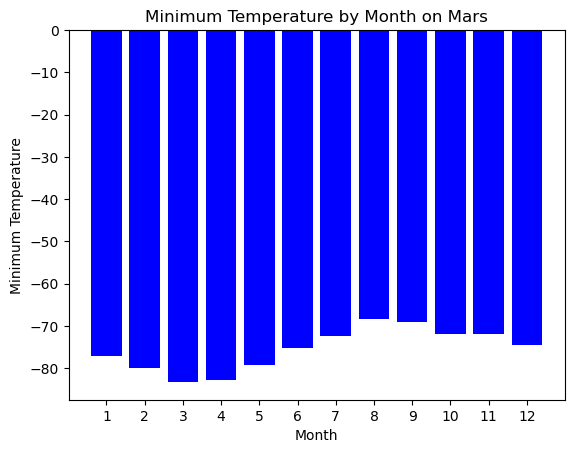

In [17]:
# Plot the average minimum temperature by month
plt.bar(avg_min_temp["month"], avg_min_temp["min_temp"], color="blue")

plt.xlabel("Month")
plt.ylabel("Minimum Temperature")
plt.title("Minimum Temperature by Month on Mars")
plt.xticks(mars_info_df["month"].unique())

plt.show()

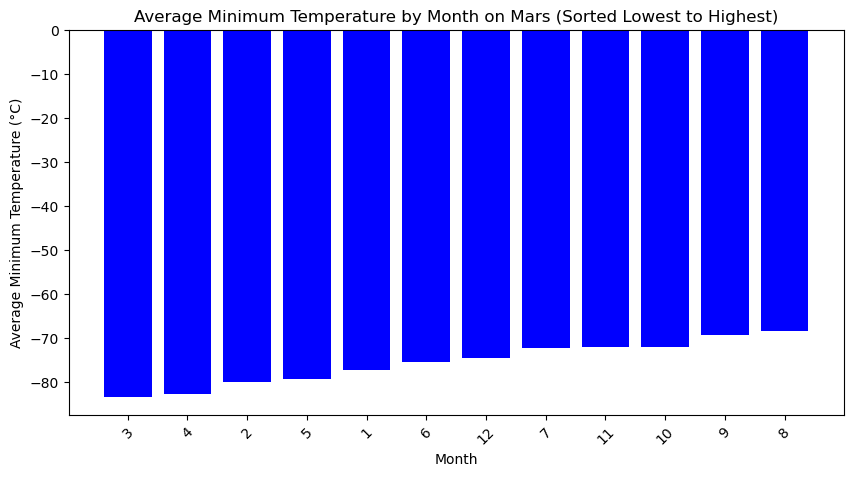

In [ ]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_sorted = avg_min_temp.sort_values("min_temp", ascending=True)

plt.figure(figsize=(10, 5))
plt.bar(avg_min_temp_sorted["month"].astype(str), avg_min_temp_sorted["min_temp"], color="blue")

# Labeling
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.title("Average Minimum Temperature by Month on Mars (Sorted Lowest to Highest)")

# Ensure all month labels are displayed
plt.xticks(ticks=avg_min_temp_sorted["month"].astype(str), labels=avg_min_temp_sorted["month"].astype(str), rotation=45)

# Show the plot
plt.show()

In [22]:
# 4. What is the average pressure by month?
avg_pressure = mars_info_df.groupby("month", as_index=False)["pressure"].mean()
print(avg_pressure)

    month    pressure
0       1  862.488506
1       2  889.455056
2       3  877.322917
3       4  806.329897
4       5  748.557047
5       6  745.054422
6       7  795.105634
7       8  873.829787
8       9  913.305970
9      10  887.312500
10     11  857.014493
11     12  842.156627


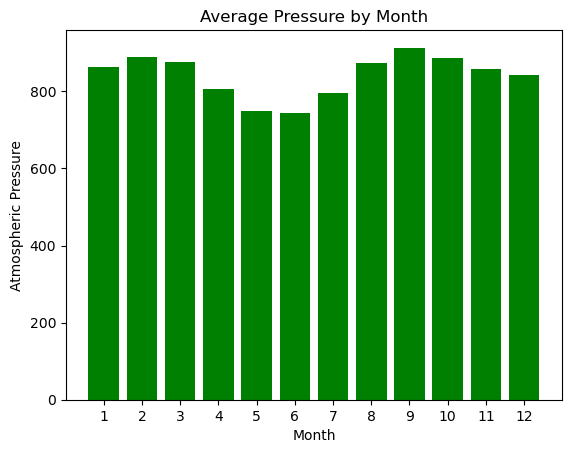

In [23]:
# Plot the average pressure by month
plt.bar(avg_pressure["month"], avg_pressure["pressure"], color="green")

plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")
plt.xticks(mars_info_df["month"].unique())

plt.show()

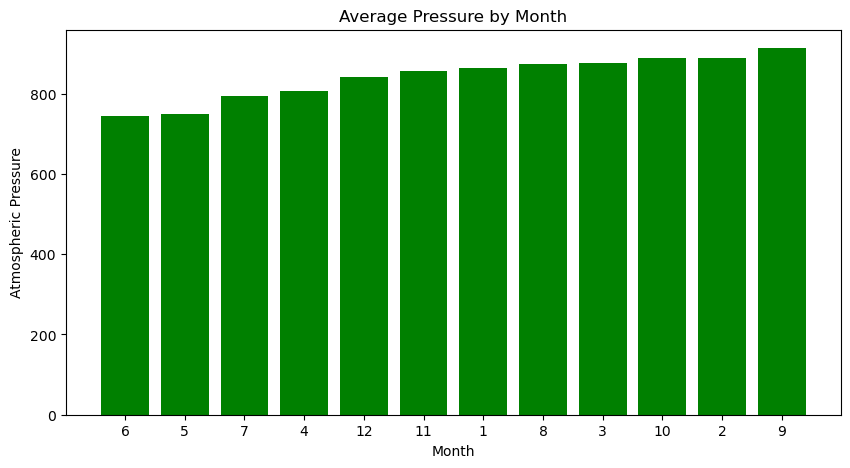

In [24]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_sorted = avg_pressure.sort_values("pressure", ascending=True)

plt.figure(figsize=(10, 5))
plt.bar(avg_pressure_sorted["month"].astype(str), avg_pressure_sorted["pressure"], color="green")

# Labeling
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")

# Ensure all month labels are displayed
plt.xticks(ticks=avg_pressure_sorted["month"].astype(str), labels=avg_pressure_sorted["month"].astype(str))

# Show the plot
plt.show()

In [25]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Calculate the number of terrestrial days in a Martian year
terresitial_days = mars_info_df["terrestrial_date"].nunique()
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
print(terresitial_days)

1867


In [27]:
# Get the row with the lowest temperature
lowest_temp= avg_min_temp.loc[avg_min_temp["min_temp"].idxmin()]

# Extract the month and temperature
lowest_temp_month = lowest_temp["month"]
lowest_temp_value = lowest_temp["min_temp"]

# Get month with the lowest presure
lowest_pressure = avg_pressure.loc[avg_pressure["pressure"].idxmin()]

# Extract the month and pressure
lowest_pressure_month = lowest_pressure["month"]
lowest_pressure_value = lowest_pressure["pressure"]

# Get the month with the highest pressure
highest_pressure = avg_pressure.loc[avg_pressure["pressure"].idxmax()]

# Extract the month and pressure
highest_pressure_month = highest_pressure["month"]
highest_pressure_value = highest_pressure["pressure"]

# Display the result

print(f"Month {lowest_temp_month} had the lowest temperature of {lowest_temp_value}")
print(f"Month {lowest_pressure_month} had the lowest pressure of {lowest_pressure_value}")
print(f"Month {highest_pressure_month} had the highest pressure of {highest_pressure_value}")

Month 3.0 had the lowest temperature of -83.30729166666667
Month 6.0 had the lowest pressure of 745.0544217687075
Month 9.0 had the highest pressure of 913.3059701492538


#### Minimum Temperature

##### Month 3 had the lowest temperature of -83.30729166666667

#### Atmospheric Pressure

##### Month 6 had the lowest pressure and Month 9 had the highest.
##### The first and last 3 months of the years had the highest pressure with a noticeable dip during the middle months.

#### Year Length

##### A Mars year is 1,867 days long. That is how long the earth month of January felt.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [28]:
# Write the data to a CSV
mars_info_df.to_csv("mars_weather_data.csv", index=False)

In [22]:
browser.quit()